In [20]:
##Importing most of the libraries we have used in our assignments that we will use in this project

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from matplotlib.colors import ListedColormap
from numpy import array
from numpy import argmax

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




# Read in the CSV file we will be using for this project
# Data location
data_url = 'http://data.insideairbnb.com/united-states/hi/hawaii/2021-07-08/visualisations/listings.csv'
h_df = pd.read_csv(data_url, header=0)
h_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04266,-155.43259,Entire home/apt,85,2,42,2020-03-22,0.41,1,250
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,150,3,12,2021-04-08,0.10,3,188
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,85,5,176,2021-06-08,1.66,3,176
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,Entire home/apt,239,6,31,2021-06-26,0.57,3,153
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88151,-159.47346,Entire home/apt,96,3,150,2021-06-17,2.07,1,131


# Data analysis

In [21]:
# Price
h_df['price'].describe()

count    21808.000000
mean       383.803467
std        771.938632
min          0.000000
25%        150.000000
50%        233.000000
75%        389.000000
max      24999.000000
Name: price, dtype: float64

In [22]:
# Neighbourhood groups
h_df['neighbourhood_group'].value_counts()

Maui        7548
Honolulu    6468
Hawaii      4788
Kauai       3004
Name: neighbourhood_group, dtype: int64

In [23]:
# Avg Price in neighbourhood groups
avg_price = h_df.groupby('neighbourhood_group')['price'].mean()

print(avg_price)

neighbourhood_group
Hawaii      311.687552
Honolulu    298.840909
Kauai       440.126831
Maui        479.939322
Name: price, dtype: float64


# Replacing NaN values with values of Zero

In [24]:
# View the type of each field of the data
h_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [25]:
# Check whether the data has missing values
h_df.isna().any()

id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [26]:
# Replace the NaN values in last_review and reviews_per_month colum with 0
h_df[['last_review', 'reviews_per_month']] = h_df[['last_review', 'reviews_per_month']].replace(np.nan, 0)
#Check data to make sure the change occured
h_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04266,-155.43259,Entire home/apt,85,2,42,2020-03-22,0.41,1,250
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,150,3,12,2021-04-08,0.10,3,188
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,85,5,176,2021-06-08,1.66,3,176
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,Entire home/apt,239,6,31,2021-06-26,0.57,3,153
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88151,-159.47346,Entire home/apt,96,3,150,2021-06-17,2.07,1,131


In [27]:
#Check all the numerical value data
h_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.180800e+04,2.180800e+04,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000
mean,3.081776e+07,1.094124e+08,20.899582,-157.153646,383.803467,6.565985,27.652605,1.160833,56.503577,173.042095
std,1.484796e+07,1.041841e+08,0.772461,1.230771,771.938632,15.714308,51.910806,1.928497,88.694076,101.887834
min,5.065000e+03,9.080000e+02,18.920250,-159.714620,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.896497e+07,2.801776e+07,20.704905,-157.837310,150.000000,2.000000,1.000000,0.060000,2.000000,94.000000
50%,3.233892e+07,7.973048e+07,20.955470,-156.689310,233.000000,3.000000,6.000000,0.570000,11.000000,168.000000
75%,4.514248e+07,1.519682e+08,21.287900,-156.440660,389.000000,5.000000,31.000000,1.580000,78.000000,252.000000
max,5.090137e+07,4.111116e+08,22.228980,-154.839500,24999.000000,365.000000,798.000000,43.640000,399.000000,365.000000


# Dropping listing with price of zero(free listings)

In [28]:
#Get rid of any listion that has obtained $0 for price
h_df = h_df[h_df.price !=0].copy()
h_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.180600e+04,2.180600e+04,21806.000000,21806.000000,21806.000000,21806.000000,21806.000000,21806.000000,21806.000000,21806.000000
mean,3.081669e+07,1.094022e+08,20.899618,-157.153711,383.838668,6.566495,27.649317,1.160702,56.508667,173.057966
std,1.484822e+07,1.041827e+08,0.772452,1.230738,771.965281,15.714938,51.908489,1.928377,88.696551,101.879027
min,5.065000e+03,9.080000e+02,18.920250,-159.714620,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.896367e+07,2.801776e+07,20.704923,-157.837310,150.000000,2.000000,1.000000,0.060000,2.000000,94.000000
50%,3.233892e+07,7.970065e+07,20.955470,-156.689310,233.000000,3.000000,6.000000,0.570000,11.000000,168.000000
75%,4.514389e+07,1.519657e+08,21.287900,-156.440663,389.000000,5.000000,31.000000,1.580000,78.000000,252.000000
max,5.090137e+07,4.111116e+08,22.228980,-154.839500,24999.000000,365.000000,798.000000,43.640000,399.000000,365.000000


# Inspecting columns with labels and how many they have for encoding

In [29]:
h_df['name'].value_counts()

Wyndham at Waikiki Beach Walk® - 2 Bedroom Deluxe        22
Wyndham at Waikiki Beach Walk® - 1 Bedroom Suite         15
Club Wyndham at Waikiki Beach Walk® - 1 Bedroom Suite    15
Worldmark Kihei, Maui - 2 BR Condo Near Beach            11
STUDIO · Marriott Ko Olina Beach Club Studio             10
                                                         ..
Sunrise Suite                                             1
113 NOELANI ♥OCEANFRONT WITH A/C                          1
Princeville Paradise - Luxury A/C                         1
Maui Resort Rentals: Honua Kai Konea 545                  1
3BR condo with pool and 5min walk to the beach!           1
Name: name, Length: 21464, dtype: int64

In [30]:
h_df['neighbourhood_group'].value_counts()

Maui        7548
Honolulu    6467
Hawaii      4787
Kauai       3004
Name: neighbourhood_group, dtype: int64

In [31]:
h_df['neighbourhood'].value_counts()

Primary Urban Center     4541
Kihei-Makena             3564
Lahaina                  3423
North Kona               1951
North Shore Kauai        1152
Koloa-Poipu              1109
South Kohala             1051
Puna                      848
Kapaa-Wailua              510
Koolauloa                 407
Koolaupoko                399
Ewa                       384
South Hilo                352
North Shore Oahu          350
South Kona                238
Lihue                     203
Waianae                   203
Paia-Haiku                200
Kau                       175
East Honolulu             148
Molokai                   145
Wailuku-Kahului           103
North Kohala               86
Hana                       70
Hamakua                    52
Makawao-Pukalani-Kula      37
Central Oahu               35
North Hilo                 34
Waimea-Kekaha              29
Lanai                       6
Hanapepe-Eleele             1
Name: neighbourhood, dtype: int64

In [32]:
h_df['room_type'].value_counts()

Entire home/apt    19810
Private room        1864
Hotel room            90
Shared room           42
Name: room_type, dtype: int64

# One hot encode"room_tyoe"

In [33]:
# one hor encoding of room tyoe

h_df = pd.concat([h_df, pd.get_dummies(h_df['room_type'])], axis=1)
h_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04266,-155.43259,Entire home/apt,85,2,42,2020-03-22,0.41,1,250,1,0,0,0
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,150,3,12,2021-04-08,0.10,3,188,1,0,0,0
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,85,5,176,2021-06-08,1.66,3,176,1,0,0,0
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,Entire home/apt,239,6,31,2021-06-26,0.57,3,153,1,0,0,0
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88151,-159.47346,Entire home/apt,96,3,150,2021-06-17,2.07,1,131,1,0,0,0


In [34]:
#Drop the room type column
h_df = h_df.drop(columns = ['room_type'])
h_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04266,-155.43259,85,2,42,2020-03-22,0.41,1,250,1,0,0,0
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,150,3,12,2021-04-08,0.10,3,188,1,0,0,0
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,85,5,176,2021-06-08,1.66,3,176,1,0,0,0
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,239,6,31,2021-06-26,0.57,3,153,1,0,0,0
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88151,-159.47346,96,3,150,2021-06-17,2.07,1,131,1,0,0,0


# One hot encode "neighbourhood_group"

In [35]:
#One hot encode neighbourhood_group
h_df = pd.concat([h_df, pd.get_dummies(h_df['neighbourhood_group'])], axis=1)
h_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room,Hawaii,Honolulu,Kauai,Maui
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04266,-155.43259,85,2,...,1,250,1,0,0,0,1,0,0,0
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,150,3,...,3,188,1,0,0,0,1,0,0,0
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,85,5,...,3,176,1,0,0,0,1,0,0,0
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,239,6,...,3,153,1,0,0,0,1,0,0,0
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88151,-159.47346,96,3,...,1,131,1,0,0,0,0,0,1,0


In [36]:
#Drop the neighbourhood group after encoding it
h_df = h_df.drop(columns =['neighbourhood_group'])
h_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room,Hawaii,Honolulu,Kauai,Maui
0,5065,MAUKA BB,7257,Wayne,Hamakua,20.04266,-155.43259,85,2,42,...,1,250,1,0,0,0,1,0,0,0
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,South Kohala,20.02740,-155.70200,150,3,12,...,3,188,1,0,0,0,1,0,0,0
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,South Kona,19.43081,-155.88069,85,5,176,...,3,176,1,0,0,0,1,0,0,0
3,5389,Keauhou Villa,7878,Edward,North Kona,19.56604,-155.96199,239,6,31,...,3,153,1,0,0,0,1,0,0,0
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Koloa-Poipu,21.88151,-159.47346,96,3,150,...,1,131,1,0,0,0,0,0,1,0


In [37]:
#Dropping the id, host id, host name since it should have no affect on the price of the listing
h_df = h_df.drop(columns = ['id', 'host_id', 'host_name'])
h_df.head()

,name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room,Hawaii,Honolulu,Kauai,Maui
0,MAUKA BB,Hamakua,20.04266,-155.43259,85,2,42,2020-03-22,0.41,1,250,1,0,0,0,1,0,0,0
1,Upcountry Hospitality in the 'Auwai Suite,South Kohala,20.02740,-155.70200,150,3,12,2021-04-08,0.10,3,188,1,0,0,0,1,0,0,0
2,Hale Koa Studio & 1 Bedroom Units!!,South Kona,19.43081,-155.88069,85,5,176,2021-06-08,1.66,3,176,1,0,0,0,1,0,0,0
3,Keauhou Villa,North Kona,19.56604,-155.96199,239,6,31,2021-06-26,0.57,3,153,1,0,0,0,1,0,0,0
4,STAY AT PRINCE KUHIO!,Koloa-Poipu,21.88151,-159.47346,96,3,150,2021-06-17,2.07,1,131,1,0,0,0,0,0,1,0


In [38]:
names = h_df['name'].iloc[1]
print(names)
neigh = h_df['neighbourhood']
#print(neigh[0])
neigh_listA = []
for x in neigh:
    if x not in neigh_listA:
        neigh_listA.append(x)
        
print(len(neigh_listA))

Upcountry Hospitality in the 'Auwai Suite
31


# Encoding "name", prepping data


In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

redundant_words = ['room','apartment','bedroom','1','2','!',',','&','.','-',')','(',
                  'apt','studio','loft','w/','+','*','brooklyn','manhattan','nyc','east',
                  'west','south','north','3','Bronx', 'Queens','Staten Island','1br','bed','near',
                  'williamsburg','bushwick','side','midtown','lower','upper','one','brownstone','br',
                  'home','location','harlem','square', ':', '#']
top_words = 20
txt = h_df.name.str.lower().str.replace(r'\|',' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords_t = nltk.corpus.stopwords.words('english')
stopwords_t.extend(redundant_words)
stopwords_t.extend(neigh_listA)
words_notstop_dist = nltk.FreqDist(w for w in words if w not in stopwords_t)

rslt = pd.DataFrame(words_notstop_dist.most_common(top_words),columns=['Word','Freq'])
print("Frequency of top occuring words")
print("-------------------------------")
print(rslt)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-40-5fdab86949b2>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = h_df.name.str.lower().str.replace(r'\|',' ').str.cat(sep=' ')


Frequency of top occuring words
-------------------------------
          Word  Freq
0        ocean  4516
1        beach  4460
2        condo  3333
3         view  3181
4        views  2249
5      waikiki  2066
6         maui  1757
7       resort  1559
8         pool  1441
9   oceanfront  1410
10     private  1159
11       floor  1138
12      sleeps   935
13       suite   884
14         kai   877
15        hale   864
16       front   852
17       villa   818
18       lanai   806
19          ac   800


<AxesSubplot:>

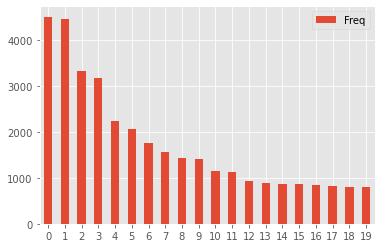

In [41]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)

In [42]:
freq_words = ['ocean','beach','conda','view','views','waikiki','maui','resort','pool','oceanfront','private','floor','sleeps','suite','kai','hale','front','villa','lanai','ac']
#want to lower case all the words in my previous stopwords_t list
l = [item.lower() for item in stopwords_t]

def encode_names(name,fword,stops):
    
    word_counter = 0
    stoppingwords = stops
    txt = nltk.tokenize.word_tokenize(str(name).lower())
    ready_txt =[x for x in txt if x not in stops]
    
    for word in ready_txt:
        if word in fword:
            return 1
        else:
            continue
            
    return 0





print(len(h_df.index))

name_df = []


name_df = h_df['name'].apply(lambda x : encode_names(x,freq_words,l))

name_df[::]

21806


0        0
1        1
2        1
3        1
4        0
        ..
21803    1
21804    1
21805    0
21806    1
21807    1
Name: name, Length: 21806, dtype: int64

In [43]:
h_df['name_encode'] = name_df
h_df.head()

,name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room,Hawaii,Honolulu,Kauai,Maui,name_encode
0,MAUKA BB,Hamakua,20.04266,-155.43259,85,2,42,2020-03-22,0.41,1,250,1,0,0,0,1,0,0,0,0
1,Upcountry Hospitality in the 'Auwai Suite,South Kohala,20.02740,-155.70200,150,3,12,2021-04-08,0.10,3,188,1,0,0,0,1,0,0,0,1
2,Hale Koa Studio & 1 Bedroom Units!!,South Kona,19.43081,-155.88069,85,5,176,2021-06-08,1.66,3,176,1,0,0,0,1,0,0,0,1
3,Keauhou Villa,North Kona,19.56604,-155.96199,239,6,31,2021-06-26,0.57,3,153,1,0,0,0,1,0,0,0,1
4,STAY AT PRINCE KUHIO!,Koloa-Poipu,21.88151,-159.47346,96,3,150,2021-06-17,2.07,1,131,1,0,0,0,0,0,1,0,0


In [44]:
h_df = h_df.drop(columns = ['name', 'last_review'])
h_df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room,Hawaii,Honolulu,Kauai,Maui,name_encode
0,Hamakua,20.04266,-155.43259,85,2,42,0.41,1,250,1,0,0,0,1,0,0,0,0
1,South Kohala,20.02740,-155.70200,150,3,12,0.10,3,188,1,0,0,0,1,0,0,0,1
2,South Kona,19.43081,-155.88069,85,5,176,1.66,3,176,1,0,0,0,1,0,0,0,1
3,North Kona,19.56604,-155.96199,239,6,31,0.57,3,153,1,0,0,0,1,0,0,0,1
4,Koloa-Poipu,21.88151,-159.47346,96,3,150,2.07,1,131,1,0,0,0,0,0,1,0,0


In [45]:
h_df = h_df.drop(columns = ['longitude', 'latitude'])
h_df.head()

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room,Hawaii,Honolulu,Kauai,Maui,name_encode
0,Hamakua,85,2,42,0.41,1,250,1,0,0,0,1,0,0,0,0
1,South Kohala,150,3,12,0.10,3,188,1,0,0,0,1,0,0,0,1
2,South Kona,85,5,176,1.66,3,176,1,0,0,0,1,0,0,0,1
3,North Kona,239,6,31,0.57,3,153,1,0,0,0,1,0,0,0,1
4,Koloa-Poipu,96,3,150,2.07,1,131,1,0,0,0,0,0,1,0,0


# We make a copy of the table and drop another column

In [46]:
original_df = h_df.copy()
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
h_df = h_df.drop(columns=['neighbourhood'])

h_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room,Hawaii,Honolulu,Kauai,Maui,name_encode
0,85,2,42,0.41,1,250,1,0,0,0,1,0,0,0,0
1,150,3,12,0.10,3,188,1,0,0,0,1,0,0,0,1
2,85,5,176,1.66,3,176,1,0,0,0,1,0,0,0,1
3,239,6,31,0.57,3,153,1,0,0,0,1,0,0,0,1
4,96,3,150,2.07,1,131,1,0,0,0,0,0,1,0,0


# Data discovery

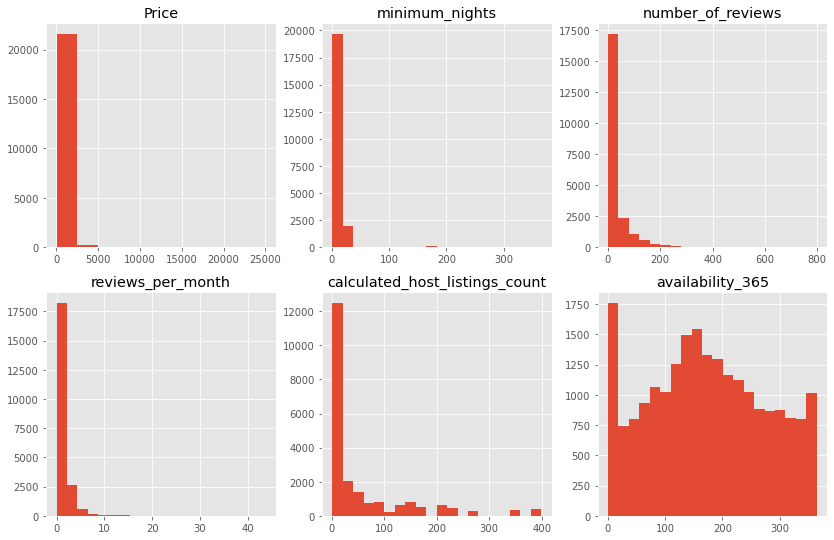

In [47]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 =fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.hist(h_df.price)
ax1.set_title("Price")


ax2.hist(h_df.minimum_nights,bins = 20)
ax2.set_title("minimum_nights")
ax3.hist(h_df.number_of_reviews,bins = 20)
ax3.set_title("number_of_reviews")
ax4.hist(h_df.reviews_per_month,bins = 20)
ax4.set_title("reviews_per_month")
ax5.hist(h_df.calculated_host_listings_count,bins = 20)
ax5.set_title("calculated_host_listings_count")
ax6.hist(h_df.availability_365,bins = 20)
ax6.set_title("availability_365")
plt.show()

In [48]:
skews = ['minimum_nights','number_of_reviews','reviews_per_month',
         'calculated_host_listings_count','availability_365']

h_df['price']= np.log(h_df.price)
for x in skews:
    h_df[x] =np.log(h_df[x]+1)

In [49]:
original_df.head()

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,Shared room,Hawaii,Honolulu,Kauai,Maui,name_encode
0,Hamakua,85,2,42,0.41,1,250,1,0,0,0,1,0,0,0,0
1,South Kohala,150,3,12,0.10,3,188,1,0,0,0,1,0,0,0,1
2,South Kona,85,5,176,1.66,3,176,1,0,0,0,1,0,0,0,1
3,North Kona,239,6,31,0.57,3,153,1,0,0,0,1,0,0,0,1
4,Koloa-Poipu,96,3,150,2.07,1,131,1,0,0,0,0,0,1,0,0


# Split the Dataset

In [50]:
cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews','reviews_per_month',
      'calculated_host_listings_count','availability_365','Entire home/apt','Private room','Maui','Hawaii','Honolulu','Kauai','name_encode']


X = h_df.drop(['price'],axis=1).copy()
y = h_df['price'].copy()

X.head()


#for x in cols:
#    X[x + "_sq"] = X[x].apply(lambda x: pow(x,2))
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the first 5 lines
print(X_test)
print('\n')
print(y_test)


# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

       minimum_nights  number_of_reviews  reviews_per_month  \
0            1.098612           3.761200           0.343590   
1            1.386294           2.564949           0.095310   
2            1.791759           5.176150           0.978326   
3            1.945910           3.465736           0.451076   
4            1.386294           5.017280           1.121678   
...               ...                ...                ...   
21803        1.791759           0.000000           0.000000   
21804        1.791759           0.000000           0.000000   
21805        1.386294           0.000000           0.000000   
21806        1.791759           0.000000           0.000000   
21807        0.693147           0.000000           0.000000   

       calculated_host_listings_count  availability_365  Entire home/apt  \
0                            0.693147          5.525453                1   
1                            1.386294          5.241747                1   
2              

# Regression

In [51]:
print(X)

       minimum_nights  number_of_reviews  reviews_per_month  \
0            1.098612           3.761200           0.343590   
1            1.386294           2.564949           0.095310   
2            1.791759           5.176150           0.978326   
3            1.945910           3.465736           0.451076   
4            1.386294           5.017280           1.121678   
...               ...                ...                ...   
21803        1.791759           0.000000           0.000000   
21804        1.791759           0.000000           0.000000   
21805        1.386294           0.000000           0.000000   
21806        1.791759           0.000000           0.000000   
21807        0.693147           0.000000           0.000000   

       calculated_host_listings_count  availability_365  Entire home/apt  \
0                            0.693147          5.525453                1   
1                            1.386294          5.241747                1   
2              

In [52]:
original_df = original_df.drop(columns=['neighbourhood','reviews_per_month','calculated_host_listings_count'])

In [53]:
print(X)

       minimum_nights  number_of_reviews  reviews_per_month  \
0            1.098612           3.761200           0.343590   
1            1.386294           2.564949           0.095310   
2            1.791759           5.176150           0.978326   
3            1.945910           3.465736           0.451076   
4            1.386294           5.017280           1.121678   
...               ...                ...                ...   
21803        1.791759           0.000000           0.000000   
21804        1.791759           0.000000           0.000000   
21805        1.386294           0.000000           0.000000   
21806        1.791759           0.000000           0.000000   
21807        0.693147           0.000000           0.000000   

       calculated_host_listings_count  availability_365  Entire home/apt  \
0                            0.693147          5.525453                1   
1                            1.386294          5.241747                1   
2              

# Linera Regression

In [54]:
# In the following line, "my_LinReg" is instantiated as an "object" of LinearRegression "class"
my_LinReg = LinearRegression()

# Fitting the model to the training dataset
my_LinReg.fit(X_train, y_train)

# Printing Theta0 using attribute "intercept_":
print(my_LinReg.intercept_)

# Printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_LinReg.coef_)

5.402421586472225
[-0.04632798 -0.09815746 -0.23201812  0.00977476  0.00154215  0.47931723
  0.38313865  0.04772326 -0.91017914 -0.1503586  -0.21637437  0.19611685
  0.17061612  0.10905351]


In [65]:
# Predictions on the testing set
predict_price = my_LinReg.predict(X_test)

print(predict_price)

# NOT SURE IF NEEDED
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, predict_price)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

#using a cross validation with 10 fold to confirm the accuracy of the RMSE
my_linreg = LinearRegression()
mse_list = cross_val_score(my_linreg,X,y,cv=10,scoring='neg_mean_squared_error')
print("\nUsing Cross Validation with 10 shuffles to confirm RMSE result")
print("-----------------------------------------------------------------")
print(mse_list)

pos_mse = -mse_list
rmse_list = np.sqrt(pos_mse)

print("\nThe Average RMSE Result from 10-fold Cross Validation ")
print("-----------------------------------------------------------------")
print("RMSE Average: " + str(rmse_list.mean()))


[5.85680754 5.68919822 5.66094513 ... 5.43992337 5.54127419 5.22798459]
0.6933650832961377

Using Cross Validation with 10 shuffles to confirm RMSE result
-----------------------------------------------------------------
[-0.36770408 -0.4414595  -0.4407039  -0.44662403 -0.44068435 -0.47223409
 -0.4950356  -0.51533657 -0.55527215 -0.63548084]

The Average RMSE Result from 10-fold Cross Validation 
-----------------------------------------------------------------
RMSE Average: 0.6917791991900625


# Result

In [85]:
# Avg Price in neighbourhood groups
avg_price = h_df.groupby('neighbourhood_group')['price'].mean()


print(rmse)

print(avg_price)
# Neighbourhood groups
h_df['neighbourhood_group'].value_counts()

0.6933650832961377
neighbourhood_group
Hawaii      311.687552
Honolulu    298.840909
Kauai       440.126831
Maui        479.939322
Name: price, dtype: float64


Maui        7548
Honolulu    6468
Hawaii      4788
Kauai       3004
Name: neighbourhood_group, dtype: int64

In [ ]:
#According to the root mean square error, find the predicted value of the average house price in each area
Hawaii 359.64
Honolulu 354.57
Kauai 478.11
Maui 540.15